X values: [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.909

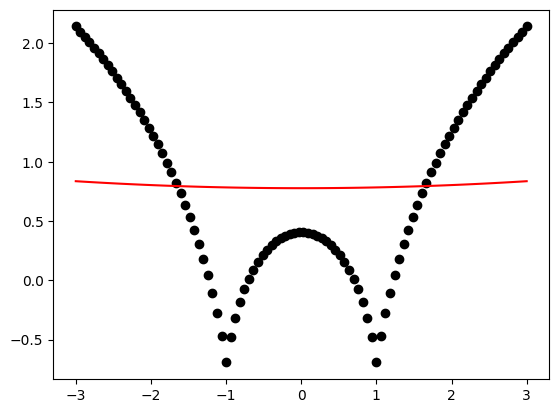

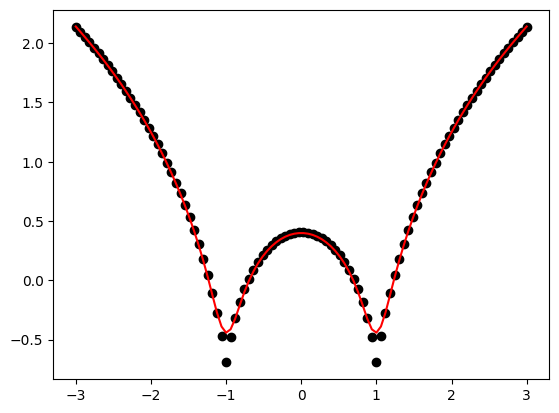

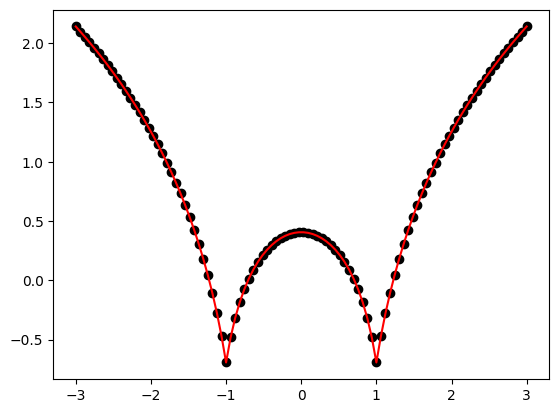

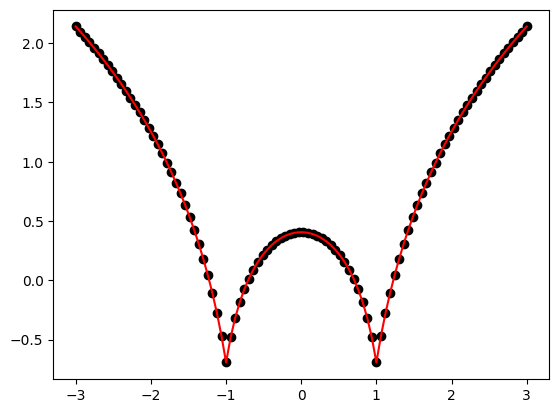

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def local_regression(x0, X, Y, tau):
    x0 = [1, x0]
    X = [[1, i] for i in X]
    X = np.asarray(X)
    W=np.diag(np.exp(-np.sum((X-x0)**2,axis=1)/(2*tau*tau)))
    beta = np.linalg.pinv(X.T@ W @ X)@X.T@ W @Y
    y_pred=np.dot(beta,x0)
    return y_pred
def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color = 'black')
    plt.plot(domain, prediction, color = 'red')
    plt.show()
X = np.linspace(-3, 3, num = 100)
domain = X
Y = np.log(np.abs(X ** 2 - 1)+ .5)
print("X values:",X)
print("Y values:",Y)
print("\n Regression Line Fit for different values of Tau- 10,0.1,0.01,0.001")
draw(10)
draw(0.1)
draw(0.01)
draw(0.001)

Missing values per column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 col

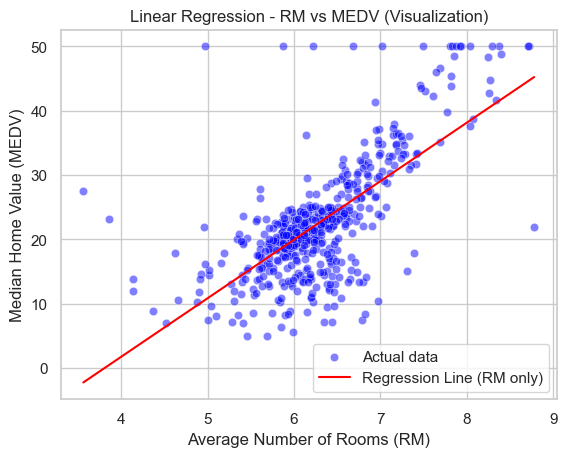

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("C:/Users/ASUS/Downloads/Boston housing dataset - Boston housing dataset.csv")
print("Missing values per column:\n", data.isnull().sum())
data.fillna(data.mean(numeric_only=True), inplace=True)
print(data.head())
print(data.shape)
print(data.info())
X = data.drop('MEDV', axis=1) 
y = data['MEDV'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
rm_model = LinearRegression()
rm_model.fit(data[['RM']], data['MEDV'])
data['Predicted'] = rm_model.predict(data[['RM']])
sns.set(style='whitegrid')
sns.scatterplot(x='RM', y='MEDV', data=data, label='Actual data', color='blue', alpha=0.5)
sns.lineplot(x='RM', y='Predicted', data=data, label='Regression Line (RM only)', color='red')
plt.title("Linear Regression - RM vs MEDV (Visualization)")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Home Value (MEDV)")
plt.legend()
plt.show()

Head of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

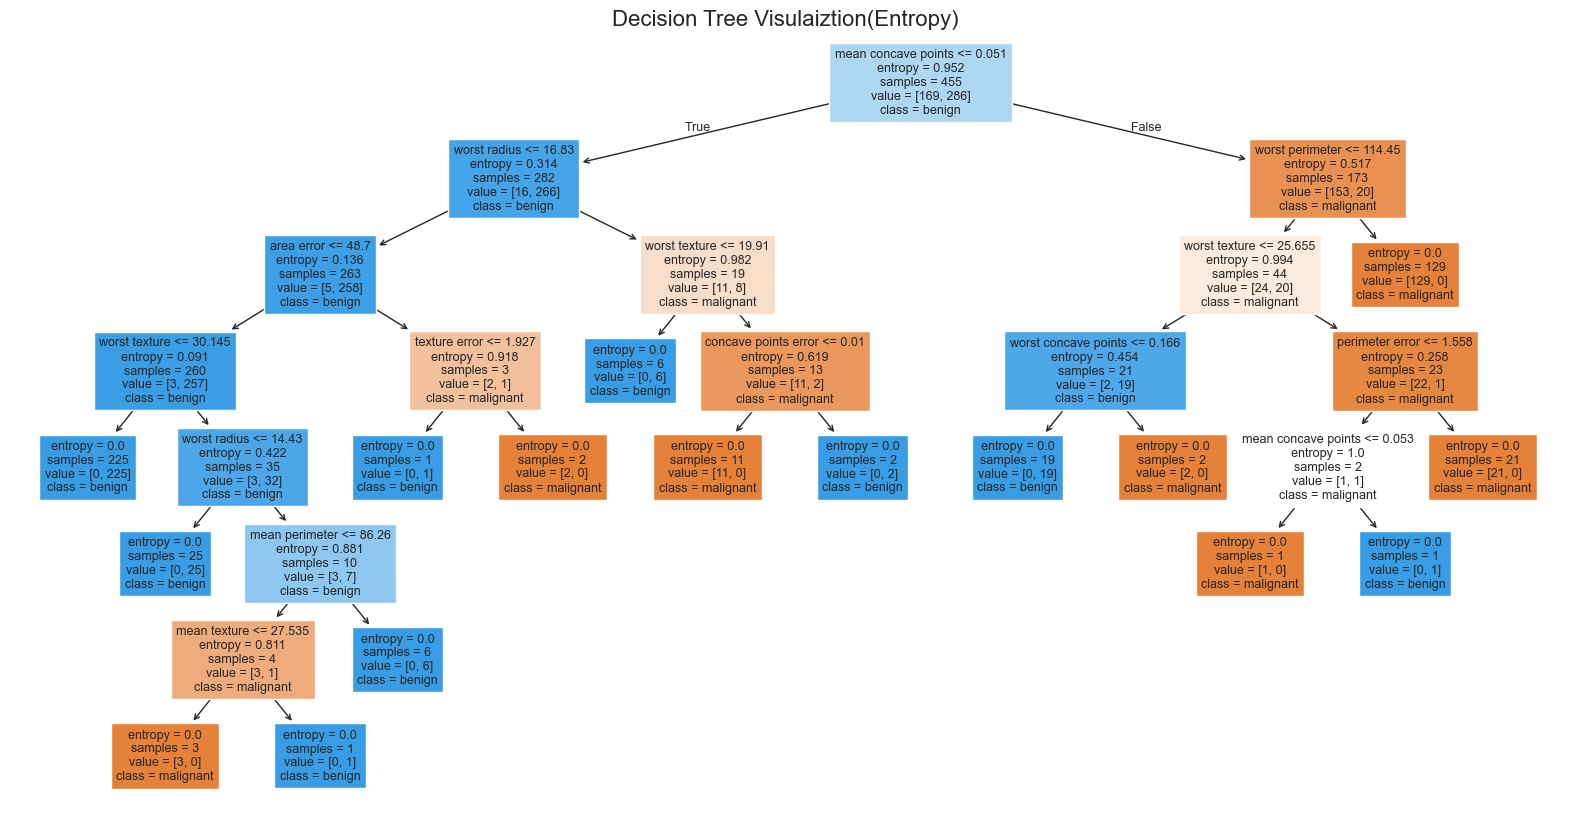

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
data=load_breast_cancer()
x=data.data
y=data.target
df=pd.DataFrame(data.data,columns=data.feature_names)
df['diagnosis']=data.target
print("Head of dataset:")
print(df.head())
print("\nHead of dataset:")
print(df.info())
print("\nDataset Shape:")
print(df.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy:",accuracy)
print("\nClassification Report:")
print(classification_report(y_test,y_pred,target_names=data.target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
new_sample=np.array([[12.5,19.2,80.0,500.0,0.085,0.1,0.05,0.02,0.17,0.06,0.4,1.0,2.5,40.0,
0.25,0.31,0.15,0.006,0.02,0.03,16.0,25.0,105.0,900.0,0.13,0.25,0.28,0.12,0.29,0.08]])
prediction=clf.predict(new_sample)
print("\nNew sample prediction:")
print("Class:",data.target_names[prediction][0])
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=data.feature_names,class_names=data.target_names,fontsize=9)
plt.title("Decision Tree Visulaiztion(Entropy)",fontsize=16)
plt.show()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv("mpg.csv")
print(data.head())
print(data.shape)
print(data.info())
# Drop rows with missing values
data.dropna(inplace=True)
# Convert 'horsepower' column to numeric
data['horsepower'] = data['horsepower'].astype(float)
# Select feature and target
X = data[['horsepower']]
y = data['mpg']
# Transform feature to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
# Create smooth curve for plotting
X_range = pd.DataFrame({'horsepower': range(int(X.min()), int(X.max())+1)})
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
# Plot
sns.set(style='whitegrid')

sns.scatterplot(x='horsepower', y='mpg', data=data, label='Actual data', alpha=0.4,
color='blue')
sns.lineplot(x='horsepower', y=y_range_pred, data=X_range, label='Polynomial Fit',
color='red')
plt.title("Polynomial Regression - Auto MPG (Horsepower vs MPG)")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (MPG)")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mpg.csv'